To plot a 2D function you will primarily need to import the matplotlib library.
"meshgrid" is a function that allows creating the coordinates for a mesh. Explore shape and values of X, and Y, and compare it with Z1, as a first exercise.
Many functions are implemented into the submodule "mlab" that reproduces many functions that already exist in Matlab and with which many students are familiar. 


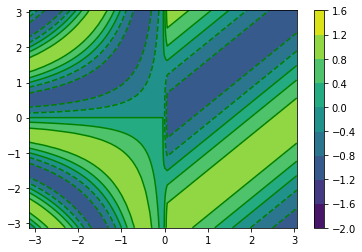

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = y = np.arange(-np.pi, np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z1 = np.sin(X*Y)
Z1[X>0]=0.
Z2 = np.cos(X-Y)
Z2[X<0]=0.
Z = (Z1 - Z2)
#CS = plt.contourf(X, Y, Z)
#CS = plt.contourf(X, Y, Z); plt.colorbar(CS)
levels = np.arange(-2.0,2.0,0.4)
CS = plt.contourf(X, Y, Z, levels)
CS4 = plt.contour(X, Y, Z, levels, colors='g')
plt.colorbar(CS)
#plt.clabel(CS4, colors='k', fontsize=16)
plt.savefig('gabriele.png')
plt.show()

In [55]:
x=np.arange(-1.0,1.0,0.1)
y=np.arange(-2.0,2.0,0.1)
X,Y=np.meshgrid(x,y)
print(X[5,5],Y[5,5])


-0.5 -1.5


In [ ]:
It is possible to plot any function over a sphere.

/home/gxm1647/anacondaNew/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


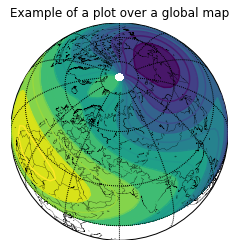

In [114]:
import mpl_toolkits.basemap as bm
import matplotlib.pyplot as plt
import numpy as np

# Let us set our view above Eurasia. And use low resolution. 
myMap =bm.Basemap(projection='ortho',lat_0=60,lon_0=60,resolution='l')

# draw coastlines, countries and continents.
myMap.drawcoastlines(linewidth=0.25)
myMap.drawcountries(linewidth=0.25)
#myMap.fillcontinents(color='orange',lake_color='aqua')

# draw the edge of the map, the meridians and the parallels
#myMap.drawmapboundary(fill_color='aqua')
myMap.drawmeridians(np.arange(0,360,30))
myMap.drawparallels(np.arange(-90,90,30))

# make up some data on a regular lat/lon grid.
n = 100; d = 2*np.pi/(n-1)
[lats,lons] = d*np.indices((n,n))
wave = np.exp(-lats/10) * np.cos(lons)
mean = np.cos(2.*lats) * np.sin(2.*lats)
x, y = myMap(lons*180./np.pi, lats*180./np.pi) #project the lat/lon on the grid
cs = myMap.contourf(x,y,mean+wave) #project a contour plot on,the map
cs = myMap.contour(x,y,mean+wave,15,linewidths=1.5) #project a contour plot on,the map
plt.title('Example of a plot over a global map')
plt.show()

[  0.00000000e+00   8.33341051e-02   1.66668210e-01 ...,   3.59753332e+02
   3.59836666e+02   3.59920000e+02]
[-90.         -89.91666667 -89.83333333 ...,  89.83333333  89.91666667  90.        ]


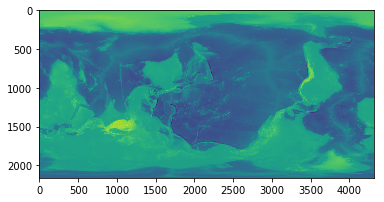

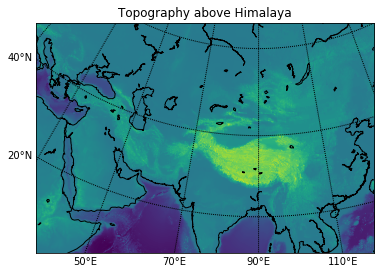

In [4]:
import mpl_toolkits.basemap as bm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
#loading the data and extracting the latitude, longitude and topography
#if this dataset is not available anymore, it can be downloaded from many, sources
#as well as the more recent higher resolution versions
#url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
#url = 'http://ferret.pmel.noaa.gov/pmel/thredds/catalog/data/PMEL/etopo5.nc'
#url='https://github.com/dcherian/tools/blob/master/ROMS/arango/bathymetry/etopo5.nc'
#url='https://github.com/dcherian/tools/raw/master/ROMS/arango/bathymetry/etopo5.nc'
#url='https://www.dropbox.com/s/bnuekeu7giq2msd/etopo5.nc?dl=0'
url = 'http://oos.soest.hawaii.edu/thredds/dodsC/etopo5'
topography = Dataset(url) #extract data using NetCDF
topoin = topography.variables['ROSE'][:]
lons = topography.variables['ETOPO05_X'][:]
lats = topography.variables['ETOPO05_Y'][:]
plt.imshow(topoin)
topoin.shape
print(lons);print(lats)
# ETOPO and basemap are shifted of 180 degrees in longitude, so we need to,shift the reference
topoin,lons = bm.shiftgrid(180.,topoin,lons,start=False)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
m = bm.Basemap(llcrnrlon=40.,llcrnrlat=0., urcrnrlon=140,urcrnrlat=60.,resolution='l',area_thresh=1000., projection='lcc',lat_1=30.,lon_0=90.,ax=ax) #viewpoint from space
n = 1000
nx = 1 + int( (m.xmax-m.xmin)/n )
ny = 1 + int( (m.ymax-m.ymin)/n )
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat)
m.drawcoastlines()
par = np.arange(0.,80.,20.); m.drawparallels(par,labels=[1,0,0,0])
mer = np.arange(10.,360.,20.); m.drawmeridians(mer,labels=[0,0,0,1])
#cb = m.colorbar(im,"right", size="5")
ax.set_title('Topography above Himalaya')
plt.show()


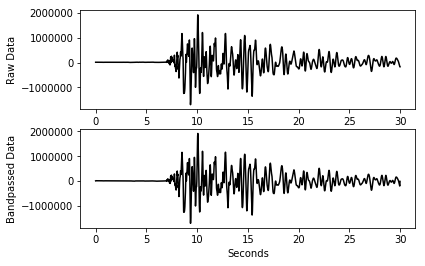

In [5]:
#Plotting a seismic event near Kilauea
import numpy as np
import matplotlib.pyplot as plt
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.signal import freqattributes

# Load the data from the web
Network = "HV"; Station = "WRM"; Location = "--"; Channel = "HHE"
t1 = UTCDateTime("2016-08-24T22:17:50.000")
client = Client("IRIS")
st = client.get_waveforms(Network, Station, Location, Channel, t1, t1 + 30)

# There is only one trace in the Stream object, let’s work on that trace...
tr = st[0]; df=tr.stats.sampling_rate; dD=tr.stats.delta

# Filtering a copy of the original Trace
fMin=0.1; fMax=20
tr_filt = tr.copy()
tr_filt.filter('bandpass', freqmin=fMin, freqmax=fMax, corners=3, zerophase=True)
tr_spec = freqattributes.spectrum(tr_filt.data,df,18001)

# Plottnig raw and filtered data
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211); plt.plot(t, tr.data, 'k'); plt.ylabel('Raw Data')
plt.subplot(212); plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Bandpassed Data'); plt.xlabel('Seconds')
plt.show()

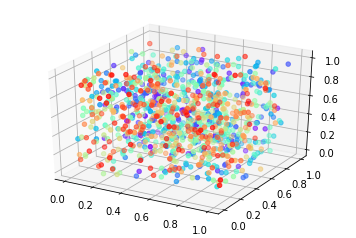

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

n = 1000
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color=cm.rainbow(np.linspace(0,1,n))
xs = np.random.rand(n)
ys = np.random.rand(n)
zs = np.random.rand(n)
ax.scatter(xs, ys, zs, c=color)
plt.show()

250 0.2275215157 1.0 1.25


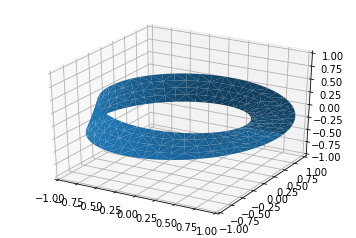

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri

n = 50; l = 5
u = np.arange(n)*2*np.pi/(n-1)
u = u * np.ones((l,1))
u = u.reshape(n*l)
v = np.arange(l)/(l-1)-0.5
v = v * np.ones((n,1))
v = v.transpose().reshape(n*l)

#Mobius mapping, (u, v) -> (x, y, z)
x= (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y= (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z= 0.5 * v * np.sin(u / 2.0)

# Create the triangulated surface
surface = tri.Triangulation(u, v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, triangles=surface.triangles)
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);
plt.show()

To run the cell in which the VTK file is created, one has to first create the x,y,z variables here on top.

In [39]:
def writeVTKSurface(outFileName,x,y,z,triangles):
    nodesNumber=x.size
    trianglesNumber=int(triangles.size/3)
    
    m=open(outFileName,'w')
    m.write('# vtk DataFile Version 2.0\n')
    m.write('Moebius surface\n')
    m.write('ASCII\n')
    m.write('DATASET POLYDATA\n')

    m.write('POINTS'+str(nodesNumber)+ 'float\n')    
    for node in np.arange(nodesNumber):
        m.write(str(x[node])+' '+str(y[node])+' '+str(z[node])+' \n')
    
    m.write('POLYGONS '+str(trianglesNumber)+' '+str(trianglesNumber*4)+'\n')
    for triangle in np.arange(trianglesNumber):
        m.write('3 '+str(triangles[triangle,0])+' '+str(triangles[triangle,1])+' '+str(triangles[triangle,2])+'\n')
    m.close()
    
    return()

#calling this function
writeVTKSurface('moebius.vtk',x,y,z,surface.triangles)   


()

line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable


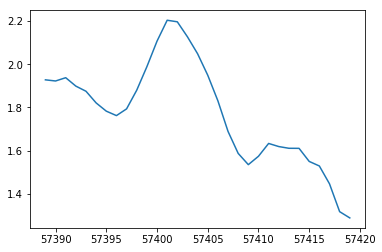

In [17]:
import urllib.parse
import urllib.request
import matplotlib.pyplot as plt

day=[]; LOD=[]
url='http://datacenter.iers.org/eop/-/somos/5Rgv/latestXL/207/bulletinb-337/csv'

with urllib.request.urlopen(url) as response:
    lines = response.read()
    lines=str(lines)
    lines = lines.split('\\n')
    for line in lines:
        words = line.split(';')
        try:
            (thisDay, thisLOD)=( float(words[0]), float(words[12]) )
            day.append(thisDay); LOD.append(thisLOD)
        except:
            print('line not readable')
plt.plot(day,LOD)
plt.show()

In [3]:
import urllib.parse
import urllib.request

numberOfYears=5
day=[]; LOD=[]
fileNames=[]
url = 'http://datacenter.iers.org/eop/-/somos/5Rgv/latestXL/207/'

for i in range(338-12*numberOfYears, 338, 1):
    fileNames.append('bulletinb-'+str(i))

for fileName in fileNames:
    with urllib.request.urlopen(url+fileName+'/csv') as response:
        lines = response.read()
        lines=str(lines)
        lines = lines.split('\\n')
        for line in lines:
            words = line.split(';')
            try:
                (thisDay, thisLOD)=( float(words[0]) , float(words[12]) )
                day.append(thisDay); LOD.append(thisLOD)
            except:
                print('line not readable')
    plt.plot(day,LOD)
    plt.show()

line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable


NameError: name 'plt' is not defined

In [19]:
import numpy as np
from scipy.spatial import ConvexHull
samples = 5000
increment = np.pi * ( 3 - 5**0.5 )
points = np.zeros((samples,3))
phi = np.arange(0., samples*increment, increment)
points[:,1] = ( 2. * np.arange(samples) + 1 )/samples - 1.
r = ( 1 - points[:,1]**2)**0.5
points[:,0] = np.cos(phi) * r
points[:,2] = np.sin(phi) * r
hull = ConvexHull(points)

In [ ]:
print(hull.points)


In [ ]:
print(topoin)

In [1]:
print()

5
